In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
stock_symbol = 'AAPL'
start_date = "2020-01-01"
end_date = "2024-12-31"


In [ ]:
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
csv_filename = f'{stock_symbol}_stock_data.csv'
stock_data.to_csv(csv_filename)
print(f"Historical stock data saved to file: {csv_filename}")


/tmp/ipython-input-3-1932507698.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Historical stock data saved to file: AAPL_stock_data.csv


In [ ]:
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
# csv_filename = f'{stock_symbol}_stock_data.csv'
# stock_data.to_csv(csv_filename)
# print(f"Historical stock data saved to file: {csv_filename}")

# stock_data = pd.read_csv(csv_filename, index_col='Date', parse_dates=True)
print("Loaded dataset shape:", stock_data.shape)
print("First few rows:\n", stock_data.head())

stock_data['Next_Close'] = stock_data['Close'].shift(-1)
stock_data.dropna(inplace=True)

input_features = stock_data[['Open', 'High', 'Low', 'Volume']]
target_label = stock_data['Next_Close']

print("Features used for prediction:\n", input_features.columns.tolist())
print("Target column name:", target_label.name)

X_train, X_test, y_train, y_test = train_test_split(
    input_features, target_label, test_size=0.2, shuffle=False
)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

linear_results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": linear_predictions
}, index=y_test.index)

forest_results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": forest_predictions
}, index=y_test.index)


/tmp/ipython-input-8-1427434027.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Loaded dataset shape: (1257, 5)
First few rows:
 Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620827  72.681274  71.373203  71.627077  135480400
2020-01-03  71.914818  72.676447  71.689957  71.847118  146322800
2020-01-06  72.487839  72.526526  70.783241  71.034702  118387200
2020-01-07  72.146950  72.753831  71.926922  72.497537  108872000
2020-01-08  73.307510  73.609745  71.849533  71.849533  132079200
Features used for prediction:
 [('Open', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Volume', 'AAPL')]
Target column name: Next_Close
Training set size: (1004, 4), Testing set size: (252, 4)


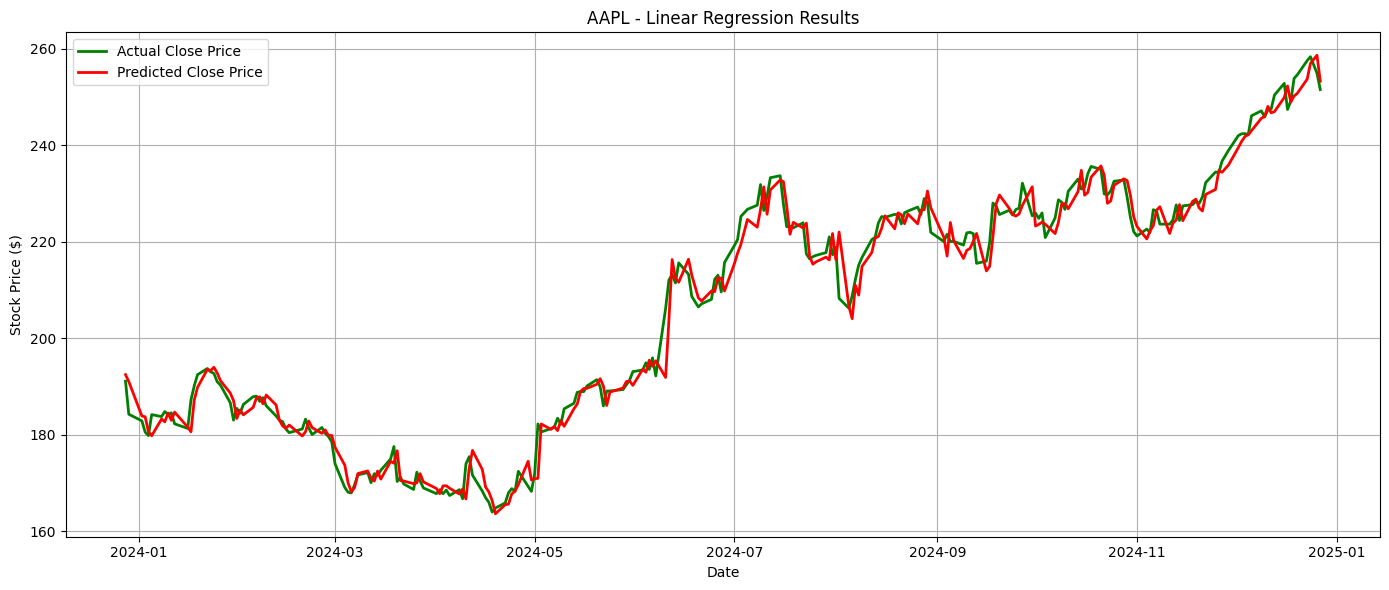

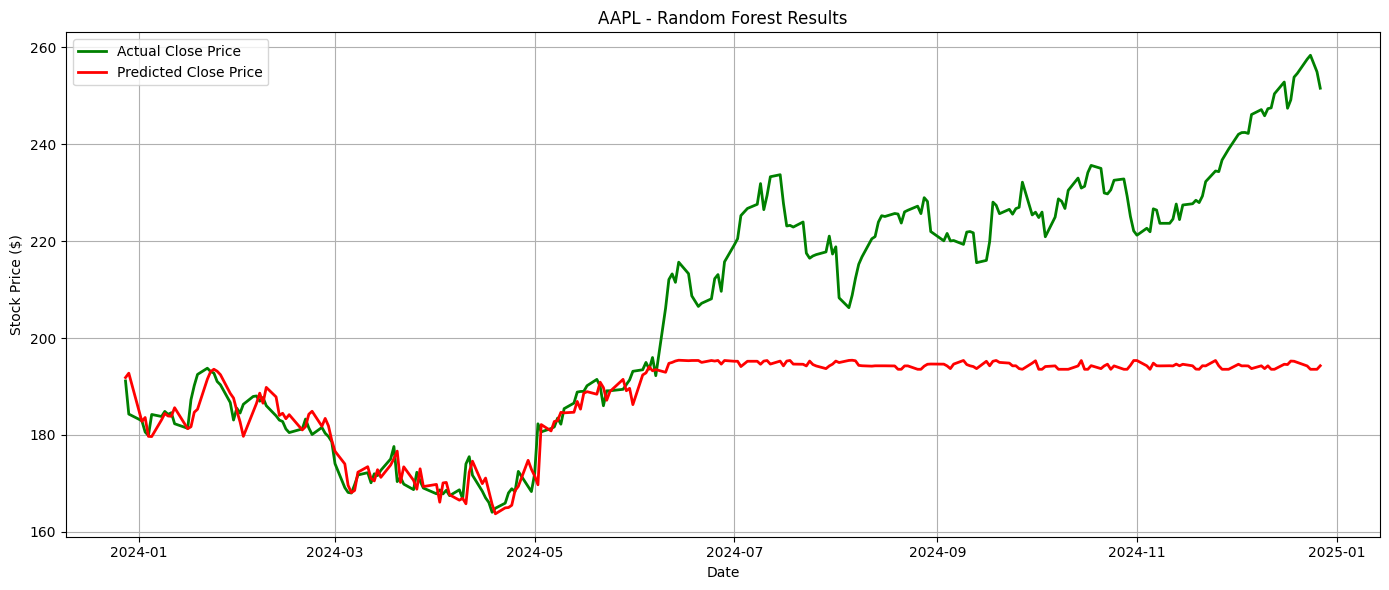

In [ ]:
def plot_predictions(actual_series, predicted_series, plot_title):
    plt.figure(figsize=(14, 6))
    plt.plot(actual_series.index, actual_series.values, label='Actual Close Price', linewidth=2, color='green')
    plt.plot(actual_series.index, predicted_series, label='Predicted Close Price', linewidth=2, color='red')
    plt.title(plot_title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predictions(linear_results['Actual'], linear_results['Predicted'], f"{stock_symbol} - Linear Regression Results")
plot_predictions(forest_results['Actual'], forest_results['Predicted'], f"{stock_symbol} - Random Forest Results")


In [ ]:
mse_lr = mean_squared_error(linear_results['Actual'], linear_results['Predicted'])
mse_rf = mean_squared_error(forest_results['Actual'], forest_results['Predicted'])

print(f"Linear Regression Mean Squared Error: {mse_lr:.4f}")
print(f"Random Forest Mean Squared Error: {mse_rf:.4f}")

Linear Regression Mean Squared Error: 9.6721
Random Forest Mean Squared Error: 662.8557
